In [1]:
from scipy import misc

In [2]:
image= misc.ascent()

In [4]:
import matplotlib.pyplot as plt

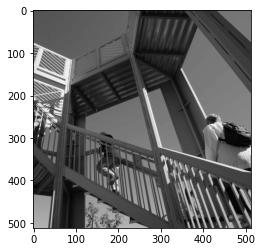

In [25]:
plt.grid(False)
plt.gray()
plt.axis("on")
plt.imshow(image)
plt.show()


In [13]:
import numpy as np

# Copy image to a numpy array
image_transformed = np.copy(image)

# Get the dimensions of the image
size_x = image_transformed.shape[0]
size_y = image_transformed.shape[1]

In [14]:
size_x,size_y

(512, 512)

In [15]:
#Building a filter of 3x3
filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

weight=1

In [19]:
for x in range(1,size_x-1):
    for y in range(1,size_y-1):
        convolution=0.0
        convolution = convolution + (image[x-1, y-1] * filter[0][0])
        convolution = convolution + (image[x-1, y] * filter[0][1])  
        convolution = convolution + (image[x-1, y+1] * filter[0][2])     
        convolution = convolution + (image[x, y-1] * filter[1][0])    
        convolution = convolution + (image[x, y] * filter[1][1])    
        convolution = convolution + (image[x, y+1] * filter[1][2])    
        convolution = convolution + (image[x+1, y-1] * filter[2][0])    
        convolution = convolution + (image[x+1, y] * filter[2][1])    
        convolution = convolution + (image[x+1, y+1] * filter[2][2])    
        
        convolution = convolution * weight   
        if (convolution<0):
            convolution = 0
        if convolution>255:
            convolution =255
        

In [23]:
image_transformed[x,y]= convolution

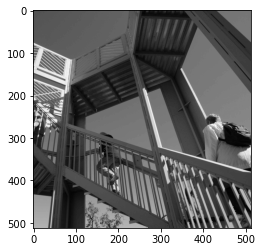

In [24]:
plt.imshow(image_transformed)

A 2x2 maxpooling layer will reduce the image by a factor of two as shown by the stride.


In [26]:
new_x= int(size_x/2)
new_y= int(size_y/2)

newImage = np.zeros((new_x,new_y))

for x in range(0,size_x,2):
    for y in range(0,size_y,2):
        pixels=[]
        pixels.append(image_transformed[x,y])
        pixels.append(image_transformed[x+1,y])
        pixels.append(image_transformed[x,y+1])
        pixels.append(image_transformed[x+1,y+1])
        
        newImage[int(x/2),int(y/2)]=max(pixels)

In [32]:
newImage.shape

(256, 256)

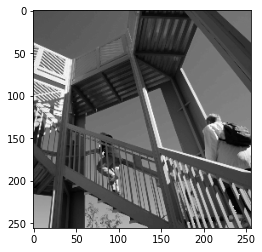

In [27]:
plt.imshow(newImage)